# Booking Cancellation Prediction

### MSc. @BGU, department of IEM, Course MLDL 364.2-1651

#### A classifier to predict hotel booking cancellations, by Dafna Meron & Oriel Peretes - 2022

## Import Dependecies & Project Setup

* Mathematical Operations
    * Pandas
    * Numpy
* Sklearn Models
    * Random Forest
    * XGBoost
    * Logistic Regression
    * Naive Bayes
* Tooling & Visualization
     * Label encoder 
     * Datetime
     * Cross validation
     * Grid Search CV
     * Classification report
     * KBinsDiscretizer
     * Seaborn
     * Matplotlib
     

In [39]:
# Imports
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Data Understanding 

### Collect data

In [40]:
# Read data from CSF file
df = pd.read_csv('hotel_bookings.csv')

### Describe data

In [41]:
# Describe Data
sampleSize = len(df)
print('Number of booking samples: ' + str(sampleSize))
df.info()
df.head(50)

Number of booking samples: 119390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-n

,Id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
5,6,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
6,7,Resort Hotel,0,0,2015,July,27,1,0,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,03/07/2015
7,8,Resort Hotel,0,9,2015,July,27,1,0,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,03/07/2015
8,9,Resort Hotel,1,85,2015,July,27,1,0,3,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,06/05/2015
9,10,Resort Hotel,1,75,2015,July,27,1,0,3,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,22/04/2015


### Explore data

Max total_of_special_requests: 5
Min total_of_special_requests: 0
Mean total_of_special_requests: 0.5713627607002262
Median total_of_special_requests: 0.0
STD total_of_special_requests: 0.7927951025979911

Max required_car_parking_spaces: 8
Min required_car_parking_spaces: 0
Mean required_car_parking_spaces: 0.06251779881062065
Median required_car_parking_spaces: 0.0
STD required_car_parking_spaces: 0.24529012019694704

Max adr: 5400.0
Min adr: -6.38
Mean adr: 101.83112153446686
Median adr: 94.575
STD adr: 50.53557864346769

Max days_in_waiting_list: 391
Min days_in_waiting_list: 0
Mean days_in_waiting_list: 2.321149174972778
Median days_in_waiting_list: 0.0
STD days_in_waiting_list: 17.594647192714895

Max booking_changes: 21
Min booking_changes: 0
Mean booking_changes: 0.22112404724013737
Median booking_changes: 0.0
STD booking_changes: 0.65230284084238

Max previous_bookings_not_canceled: 72
Min previous_bookings_not_canceled: 0
Mean previous_bookings_not_canceled: 0.137096909288885

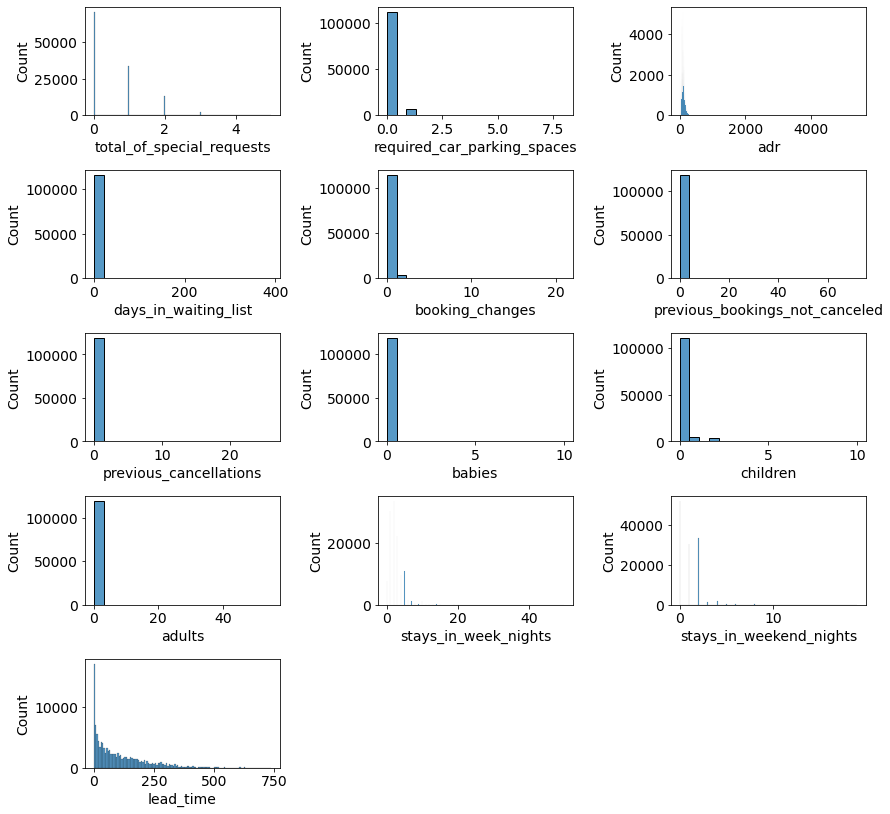

In [42]:
# Explore data
# Basic statistics of each attribute
# Continous attributes
cont_attr = ['total_of_special_requests','required_car_parking_spaces','adr','days_in_waiting_list','booking_changes','previous_bookings_not_canceled','previous_cancellations','babies','children','adults','stays_in_week_nights','stays_in_weekend_nights','lead_time']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for attr in cont_attr:
    col = cont_attr[index]
    ax = fig.add_subplot(5, 3, plot_idx)
    sns.histplot(df[col], ax=ax)
    index+=1
    plot_idx+=1
    print('Max ' + col +': '+ str(np.max(df[col])))
    print('Min ' + col +': '+ str(np.min(df[col])))
    print('Mean ' + col +': '+ str(np.mean(df[col])))
    print('Median ' + col +': '+ str(np.median(df[col])))
    print('STD ' + col +': '+ str(np.std(df[col])) + '\n')
plt.show()

Number of hotel categories: 2
Number of arrival_date_year categories: 3
Number of arrival_date_month categories: 12
Number of arrival_date_day_of_month categories: 31
Number of arrival_date_week_number categories: 53
Number of meal categories: 5
Number of country categories: 177
Number of market_segment categories: 8
Number of distribution_channel categories: 5
Number of is_repeated_guest categories: 2
Number of reserved_room_type categories: 10
Number of assigned_room_type categories: 12
Number of deposit_type categories: 3
Number of agent categories: 333
Number of company categories: 352
Number of customer_type categories: 4


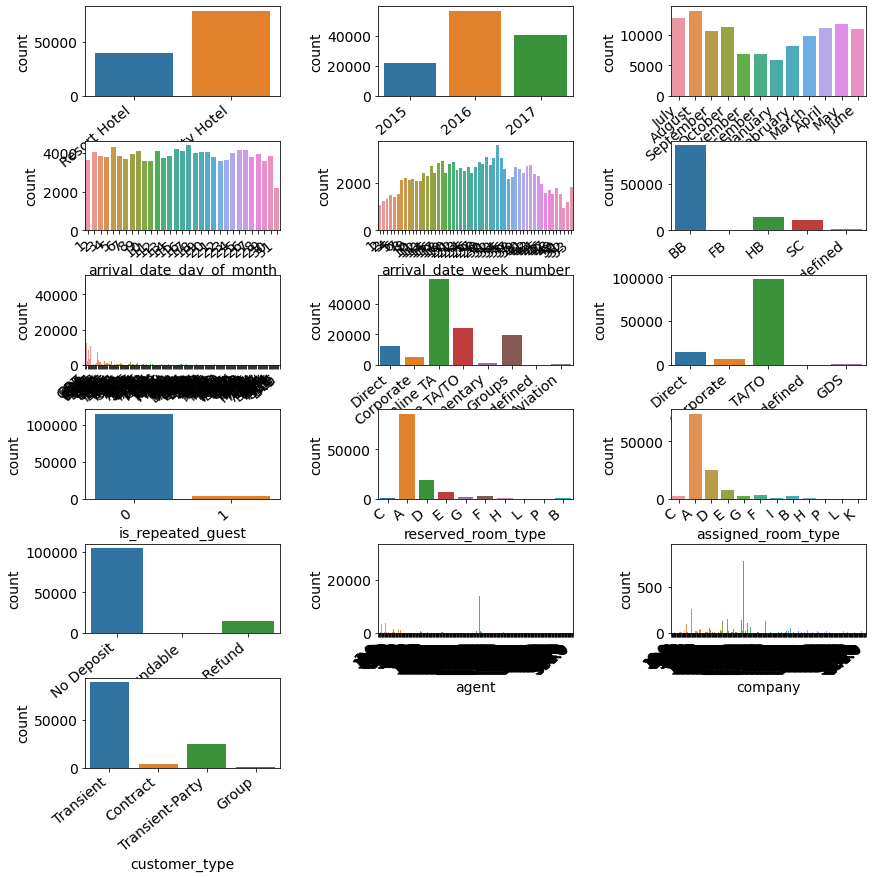

In [43]:
# Explore data
# Basic statistics of each attribute
# Categorical attributes
cat_attr = ['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type'] 
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for attr in cat_attr:
    col = cat_attr[index]
    ax = fig.add_subplot(6, 3, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    sns.countplot(df[col], ax=ax)
    index+=1
    plot_idx+=1
    num_cat = df.groupby([col], as_index=False).size()
    print('Number of ' + col +' categories: '+ str(len(num_cat)))
plt.show()

In [44]:
# Explore data
# Target variable - is canceled
isCanceledDupsSize = df.groupby(["is_canceled"], as_index=False).size()
print(isCanceledDupsSize)
print('Percentage of not canceled: {:.2f}'.format(isCanceledDupsSize.at[0, 'size'] / sampleSize))
print('Percentage of canceled: {:.2f}'.format(isCanceledDupsSize.at[1, 'size'] / sampleSize))

   is_canceled   size
0            0  75166
1            1  44224
Percentage of not canceled: 0.63
Percentage of canceled: 0.37


In [45]:
# hotel type
hotelDupsSize = df.groupby(["hotel"], as_index=False).size()
print(hotelDupsSize)
print('Percentage of city hotels: {:.2f}'.format(hotelDupsSize.at[0, 'size'] / sampleSize))
print('Percentage of resort hotels: {:.2f}'.format(hotelDupsSize.at[1, 'size'] / sampleSize))

          hotel   size
0    City Hotel  79330
1  Resort Hotel  40060
Percentage of city hotels: 0.66
Percentage of resort hotels: 0.34


          hotel  is_canceled   size
0    City Hotel            0  46228
1    City Hotel            1  33102
2  Resort Hotel            0  28938
3  Resort Hotel            1  11122


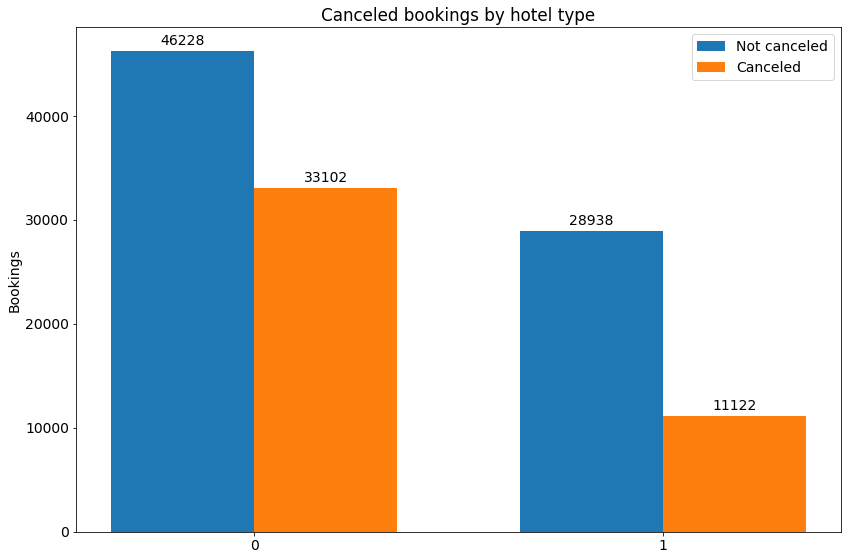

In [46]:
# is canceled by hotel type
hotelIsCanceledDupsSize = df.groupby(["hotel", "is_canceled"], as_index=False).size()
print(hotelIsCanceledDupsSize)
labels = [str(hotelDupsSize.at[0, 'hotel']), str(hotelDupsSize.at[1, 'hotel'])]
not_Canceled = [hotelIsCanceledDupsSize.at[0, 'size'], hotelIsCanceledDupsSize.at[2, 'size']]
canceled = [hotelIsCanceledDupsSize.at[1, 'size'], hotelIsCanceledDupsSize.at[3, 'size']]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, not_Canceled, width, label='Not canceled')
rects2 = ax.bar(x + width/2, canceled, width, label='Canceled')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bookings')
ax.set_title('Canceled bookings by hotel type')
ax.set_xticks(x)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

          hotel   size
0    City Hotel  79330
1  Resort Hotel  40060
   index         hotel  is_canceled   size  Cancellation_percentage
0      1    City Hotel            1  33102                 0.417270
1      3  Resort Hotel            1  11122                 0.277634
   arrival_date_year   size
0               2015  21996
1               2016  56707
2               2017  40687
   index  arrival_date_year  is_canceled   size  Cancellation_percentage
0      1               2015            1   8142                 0.370158
1      3               2016            1  20337                 0.358633
2      5               2017            1  15745                 0.386979
   arrival_date_month   size
0               April  11089
1              August  13877
2            December   6780
3            February   8068
4             January   5929
5                July  12661
6                June  10939
7               March   9794
8                 May  11791
9            November   6794
10  

52                 0.354626  
        meal   size
0         BB  92310
1         FB    798
2         HB  14463
3         SC  10650
4  Undefined   1169
   index       meal  is_canceled   size  Cancellation_percentage
0      1         BB            1  34510                 0.373849
1      3         FB            1    478                 0.598997
2      5         HB            1   4984                 0.344603
3      7         SC            1   3966                 0.372394
4      9  Undefined            1    286                 0.244654
    country  size
0       ABW     2
1       AGO   362
2       AIA     1
3       ALB    12
4       AND     7
..      ...   ...
172     VGB     1
173     VNM     8
174     ZAF    80
175     ZMB     2
176     ZWE     4

[177 rows x 2 columns]
     index country  is_canceled  size  Cancellation_percentage
0        2     AGO            1   205               102.500000
1        5     ALB            1     2                 0.005525
2        7     AND            1

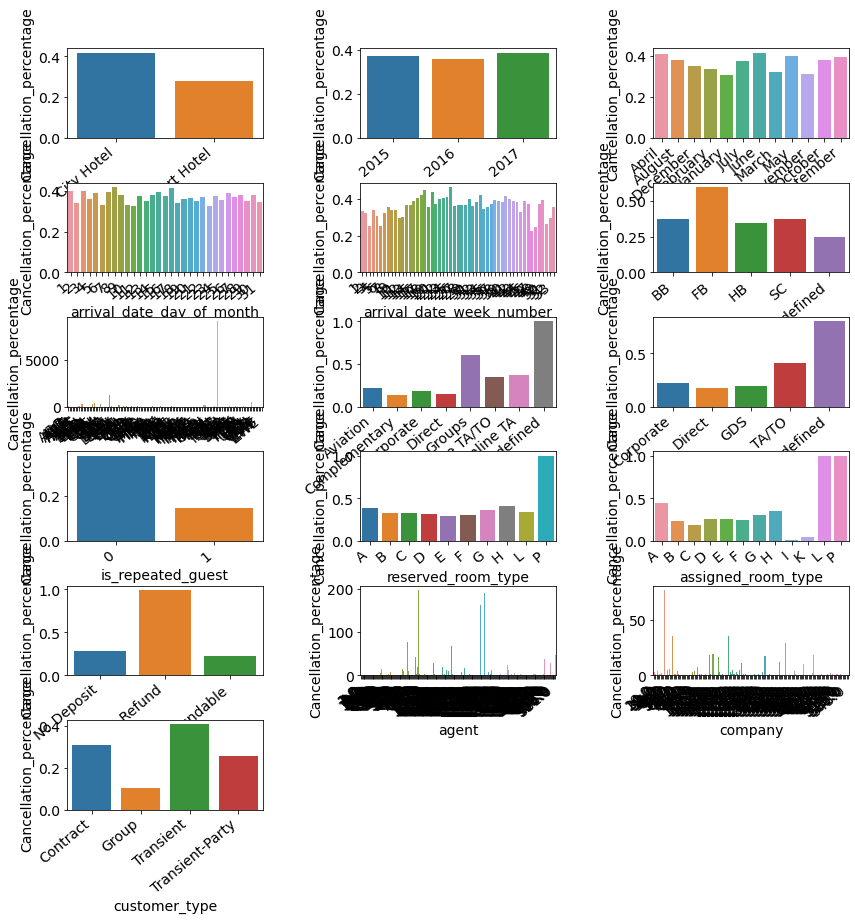

In [47]:
# Categorical attributes by target - All
attributes = ['hotel', 'arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for attr in attributes:
    attributeByTarget = df.groupby([attr, "is_canceled"], as_index=False).size()
    attributeByTarget = attributeByTarget[attributeByTarget.is_canceled == 1].reset_index()
    attrSize = df.groupby([attr], as_index=False).size()
    print(attrSize)
    attributeByTarget['Cancellation_percentage'] = attributeByTarget['size']/attrSize['size']
    print(attributeByTarget)
    col = attributes[index]
    ax = fig.add_subplot(6, 3, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    v = sns.barplot(x=attributeByTarget[col], y=attributeByTarget['Cancellation_percentage'])
    index+=1
    plot_idx+=1
plt.show()

          hotel   size
0    City Hotel  79330
1  Resort Hotel  40060
   index         hotel  is_canceled   size  Cancellation_percentage
0      1    City Hotel            1  33102                 0.417270
1      3  Resort Hotel            1  11122                 0.277634
        meal   size
0         BB  92310
1         FB    798
2         HB  14463
3         SC  10650
4  Undefined   1169
   index       meal  is_canceled   size  Cancellation_percentage
0      1         BB            1  34510                 0.373849
1      3         FB            1    478                 0.598997
2      5         HB            1   4984                 0.344603
3      7         SC            1   3966                 0.372394
4      9  Undefined            1    286                 0.244654
  market_segment   size
0       Aviation    237
1  Complementary    743
2      Corporate   5295
3         Direct  12606
4         Groups  19811
5  Offline TA/TO  24219
6      Online TA  56477
7      Undefined      2
 

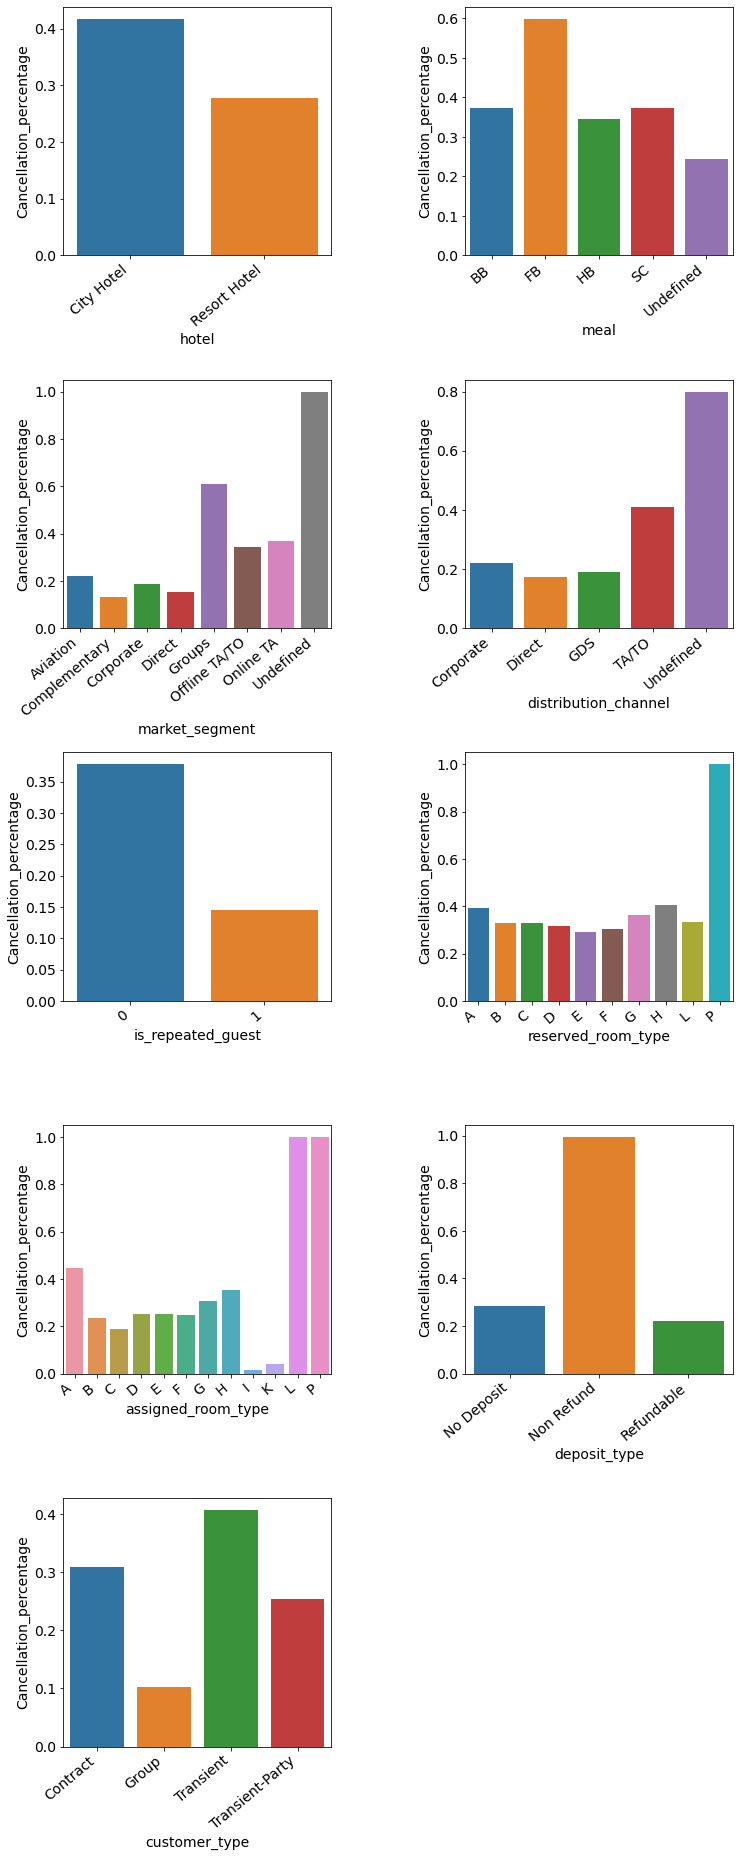

In [48]:
# Categorical attributes by target - strong only
attributes = ['hotel','meal','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(12,32)
index = 0
plot_idx = 1
for attr in attributes:
    attributeByTarget = df.groupby([attr, "is_canceled"], as_index=False).size()
    attributeByTarget = attributeByTarget[attributeByTarget.is_canceled == 1].reset_index()
    attrSize = df.groupby([attr], as_index=False).size()
    print(attrSize)
    attributeByTarget['Cancellation_percentage'] = attributeByTarget['size']/attrSize['size']
    print(attributeByTarget)
    col = attributes[index]
    ax = fig.add_subplot(5, 2, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    v = sns.barplot(x=attributeByTarget[col], y=attributeByTarget['Cancellation_percentage'])
    index+=1
    plot_idx+=1
plt.show()

   total_of_special_requests   size
0                          0  70318
1                          1  33226
2                          2  12969
3                          3   2497
4                          4    340
5                          5     40
   index  total_of_special_requests  is_canceled   size  \
0      1                          0            1  33556   
1      3                          1            1   7318   
2      5                          2            1   2866   
3      7                          3            1    446   
4      9                          4            1     36   
5     11                          5            1      2   

   Cancellation_percentage  
0                 0.477204  
1                 0.220249  
2                 0.220989  
3                 0.178614  
4                 0.105882  
5                 0.050000  
   required_car_parking_spaces    size
0                            0  111974
1                            1    7383
2             

    previous_cancellations    size
0                        0  112906
1                        1    6051
2                        2     116
3                        3      65
4                        4      31
5                        5      19
6                        6      22
7                       11      35
8                       13      12
9                       14      14
10                      19      19
11                      21       1
12                      24      48
13                      25      25
14                      26      26
    index  previous_cancellations  is_canceled   size  Cancellation_percentage
0       1                       0            1  38282                 0.339061
1       3                       1            1   5714                 0.944307
2       5                       2            1     38                 0.327586
3       7                       3            1     20                 0.307692
4       9                       4            

     lead_time  size
0            0  6345
1            1  3460
2            2  2069
3            3  1816
4            4  1715
..         ...   ...
474        622    17
475        626    30
476        629    17
477        709     1
478        737     1

[479 rows x 2 columns]
     index  lead_time  is_canceled  size  Cancellation_percentage
0        1          0            1   430                 0.067770
1        3          1            1   321                 0.092775
2        5          2            1   213                 0.102948
3        7          3            1   182                 0.100220
4        9          4            1   176                 0.102624
..     ...        ...          ...   ...                      ...
460    880        608            1    17                 1.000000
461    881        615            1    17                 0.739130
462    882        622            1    17                 1.000000
463    883        626            1    30                 1.76470

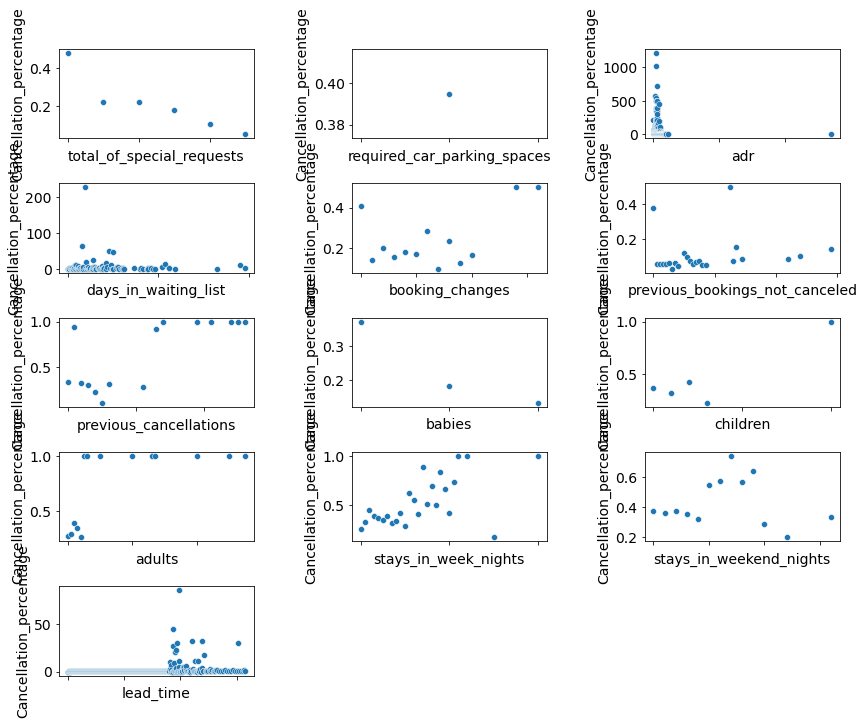

In [49]:
# Numeric attributes by target
attributes = ['total_of_special_requests','required_car_parking_spaces','adr','days_in_waiting_list','booking_changes','previous_bookings_not_canceled','previous_cancellations','babies','children','adults','stays_in_week_nights','stays_in_weekend_nights','lead_time']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for attr in attributes:
    attributeByTarget = df.groupby([attr, "is_canceled"], as_index=False).size()
    attributeByTarget = attributeByTarget[attributeByTarget.is_canceled == 1].reset_index()
    attrSize = df.groupby([attr], as_index=False).size()
    print(attrSize)
    attributeByTarget['Cancellation_percentage'] = attributeByTarget['size']/attrSize['size']
    print(attributeByTarget)
    col = attributes[index]
    ax = fig.add_subplot(6, 3, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    v = sns.scatterplot(x=attributeByTarget[col], y=attributeByTarget['Cancellation_percentage'])
    index+=1
    plot_idx+=1
plt.show()

   total_of_special_requests   size
0                          0  70318
1                          1  33226
2                          2  12969
3                          3   2497
4                          4    340
5                          5     40
   index  total_of_special_requests  is_canceled   size  \
0      1                          0            1  33556   
1      3                          1            1   7318   
2      5                          2            1   2866   
3      7                          3            1    446   
4      9                          4            1     36   
5     11                          5            1      2   

   Cancellation_percentage  
0                 0.477204  
1                 0.220249  
2                 0.220989  
3                 0.178614  
4                 0.105882  
5                 0.050000  
   required_car_parking_spaces    size
0                            0  111974
1                            1    7383
2             

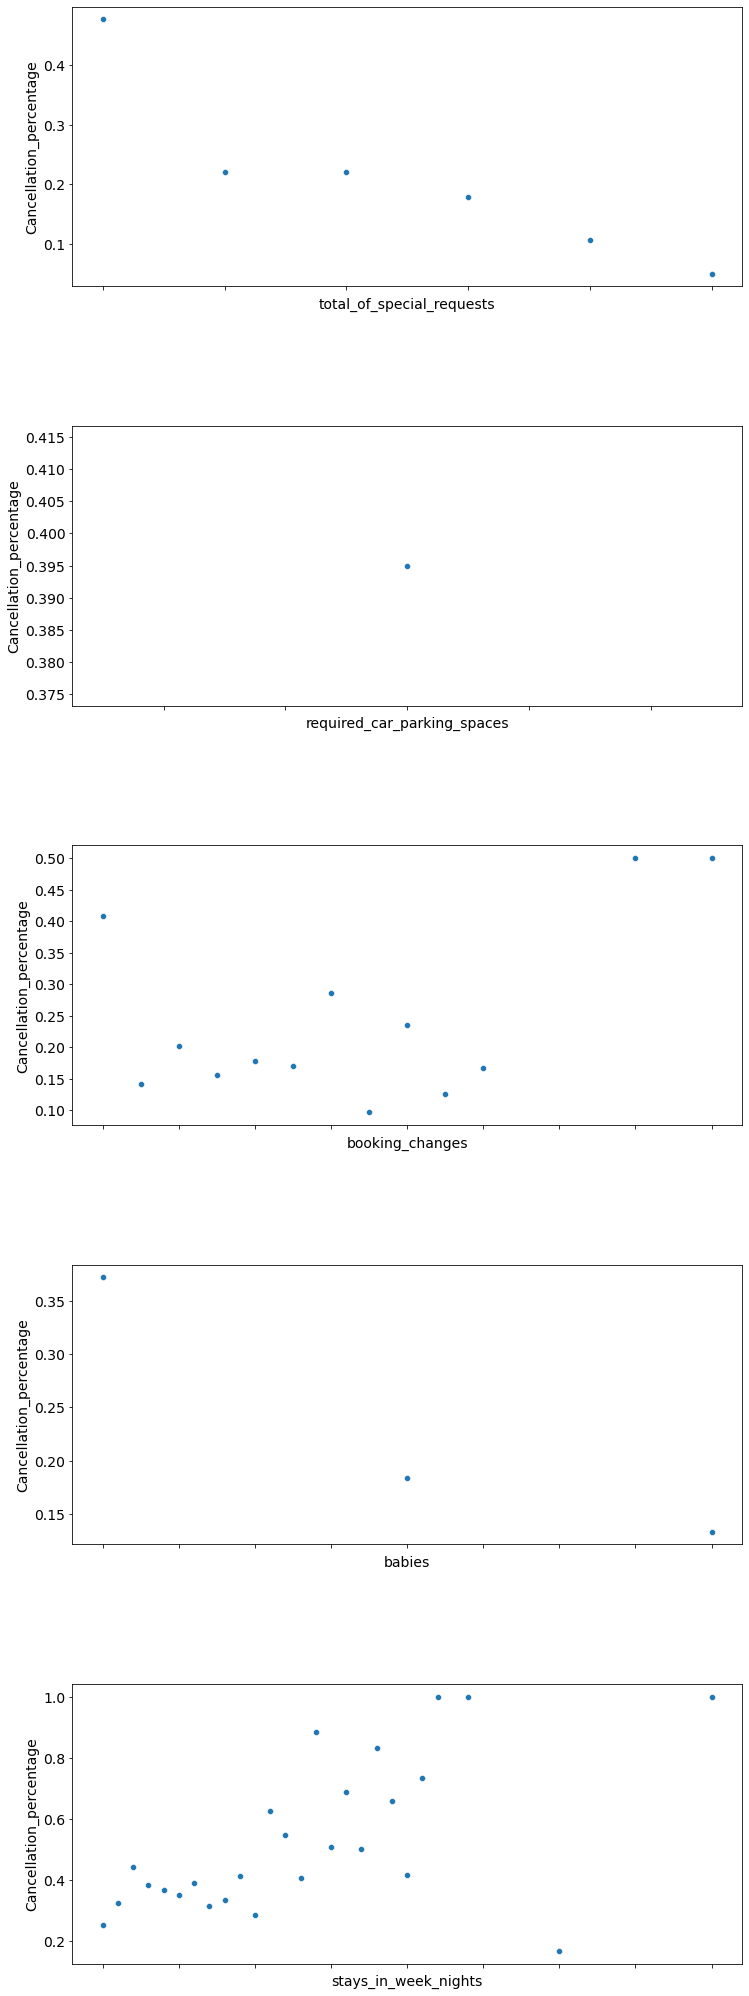

In [50]:
# Numeric attributes by target - strong only
# Try to look at cencelation count and not precentage 
attributes = ['total_of_special_requests','required_car_parking_spaces','booking_changes','babies','stays_in_week_nights']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(12,36)
index = 0
plot_idx = 1
for attr in attributes:
    attributeByTarget = df.groupby([attr, "is_canceled"], as_index=False).size()
    attributeByTarget = attributeByTarget[attributeByTarget.is_canceled == 1].reset_index()
    attrSize = df.groupby([attr], as_index=False).size()
    print(attrSize)
    attributeByTarget['Cancellation_percentage'] = attributeByTarget['size']/attrSize['size']
    print(attributeByTarget)
    col = attributes[index]
    ax = fig.add_subplot(5, 1, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    v = sns.scatterplot(x=attributeByTarget[col], y=attributeByTarget['Cancellation_percentage'])
    index+=1
    plot_idx+=1
plt.show()

### Verify data quality 

In [51]:
# Missing Values
print(df.isna().sum())

Id                                     0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [52]:
# Understand undefined category
mealGroup = df.groupby(['meal'], as_index=False).size()
print(mealGroup)

market_segmentGroup = df.groupby(["market_segment"], as_index=False).size()
print(market_segmentGroup)

distribution_channelGroup = df.groupby(["distribution_channel"], as_index=False).size()
print(distribution_channelGroup)

        meal   size
0         BB  92310
1         FB    798
2         HB  14463
3         SC  10650
4  Undefined   1169
  market_segment   size
0       Aviation    237
1  Complementary    743
2      Corporate   5295
3         Direct  12606
4         Groups  19811
5  Offline TA/TO  24219
6      Online TA  56477
7      Undefined      2
  distribution_channel   size
0            Corporate   6677
1               Direct  14645
2                  GDS    193
3                TA/TO  97870
4            Undefined      5


## Data preparation

### Select data

In [53]:
# Remove two redundant attributes, together they are equal to 'is canceled' 
df = df.drop('reservation_status_date',1)
df = df.drop('reservation_status',1)

### Clean data

In [54]:
# Agent, Company - too many missing values - remove
df = df.drop('company',1)
df = df.drop('agent',1)
# Country - fill with 'unknown'
df['country'].fillna('unknown', inplace=True)
# children - fill with median
df['children'].fillna(df['children'].median(), inplace=True)

In [55]:
# Cancel undefined category, replace with maximum size category 
maxMealIdx = mealGroup['size'].idxmax()
maxMeal = mealGroup['meal'].values[maxMealIdx]
df['meal'] = df['meal'].replace({'Undefined': maxMeal})
mealGroup = df.groupby(['meal'], as_index=False).size()
print(mealGroup)

maxMarket_segmentIdx = market_segmentGroup['size'].idxmax()
maxMarket_segment = market_segmentGroup['market_segment'].values[maxMarket_segmentIdx]
df['market_segment'] = df['market_segment'].replace({'Undefined': maxMarket_segment})
market_segmentGroup = df.groupby(["market_segment"], as_index=False).size()
print(market_segmentGroup)

maxDistribution_channelIdx =  distribution_channelGroup['size'].idxmax()
maxDistribution_channel = distribution_channelGroup['distribution_channel'].values[maxDistribution_channelIdx]
df['distribution_channel'] = df['distribution_channel'].replace({'Undefined': maxDistribution_channel})
distribution_channelGroup = df.groupby(["distribution_channel"], as_index=False).size()
print(distribution_channelGroup)

  meal   size
0   BB  93479
1   FB    798
2   HB  14463
3   SC  10650
  market_segment   size
0       Aviation    237
1  Complementary    743
2      Corporate   5295
3         Direct  12606
4         Groups  19811
5  Offline TA/TO  24219
6      Online TA  56479
  distribution_channel   size
0            Corporate   6677
1               Direct  14645
2                  GDS    193
3                TA/TO  97875


### Format data

In [56]:
# arrival_month -> convert to Integer
month = df['arrival_date_month']
# Map months to integers
dct = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
converted = list(map(dct.get, month))
# Push to DF
df['arrival_date_month'] = converted

##### Categorization by binning 

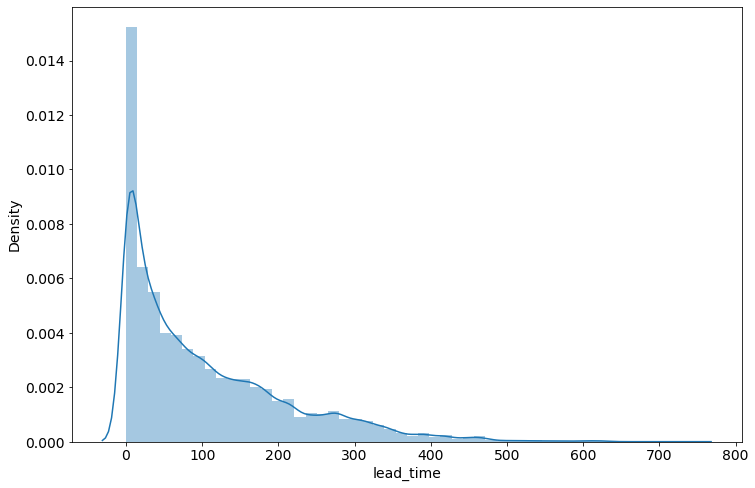

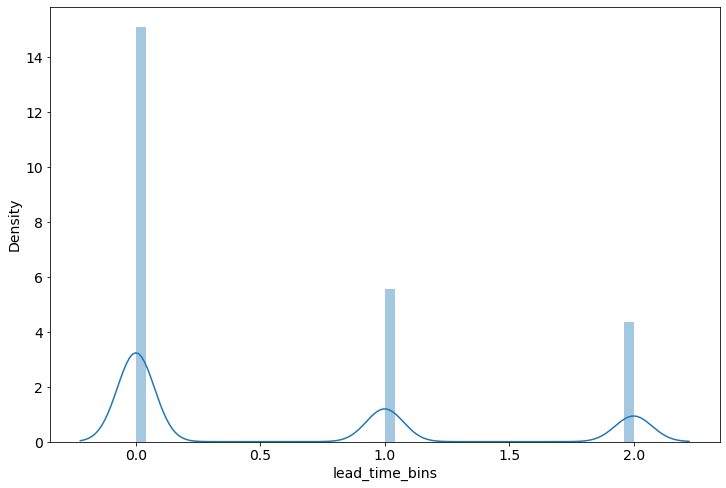

[3. 4. 0. ... 0. 1. 2.]


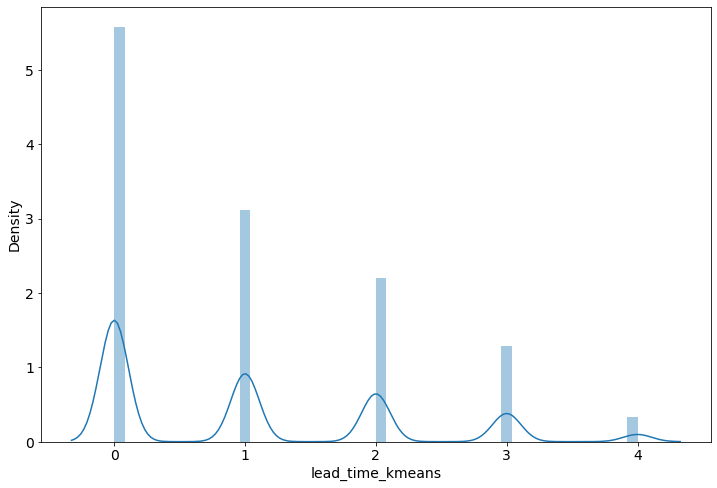

In [57]:
# lead_time -> convert to intervals
df['lead_time'].mean()
sns.distplot(df['lead_time'])
plt.show()
# Intervals -> 0-100 | 100-200 | 200+
df_lead_time = df[['lead_time']]
lead_time = df_lead_time['lead_time']
converted = []
for lt in lead_time:
    if lt >= 0 and lt <= 100:
        converted.append(0)
    if lt > 100 and lt < 200:
        converted.append(1)
    if lt >= 200:
        converted.append(2)
# Push to DF
df['lead_time_bins'] = converted
sns.distplot(df['lead_time_bins'])
plt.show()

#Improvment - binning by Kmeans
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
bins = est.fit_transform(df_lead_time).ravel()
print(bins)
df['lead_time_kmeans'] = bins
ax = sns.distplot(df['lead_time_kmeans'])


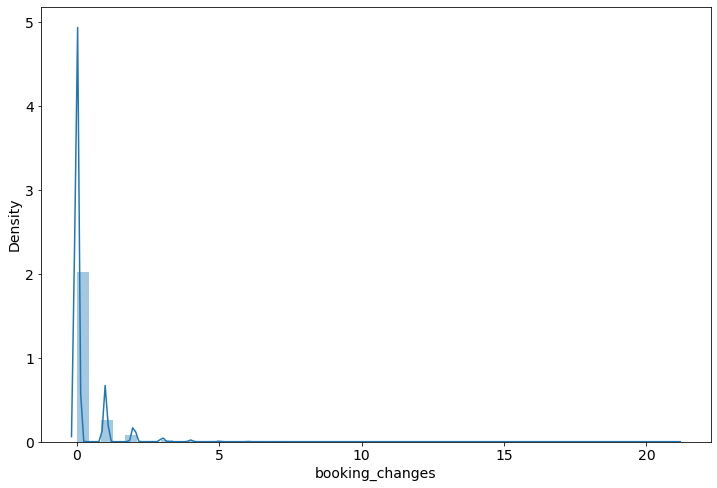

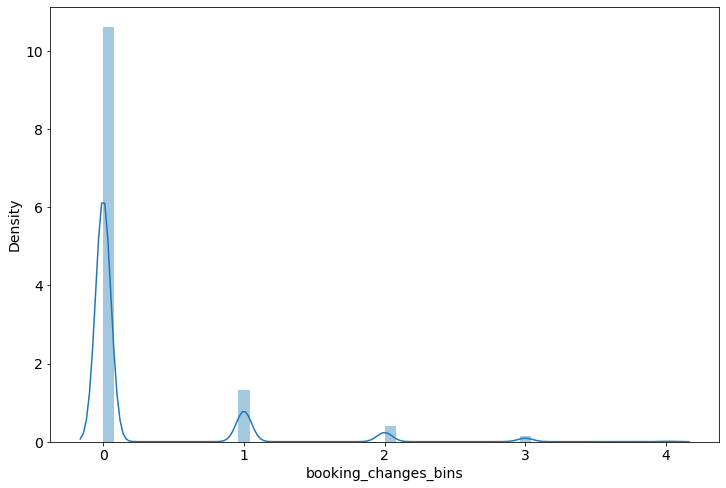

[1. 1. 0. ... 0. 0. 0.]


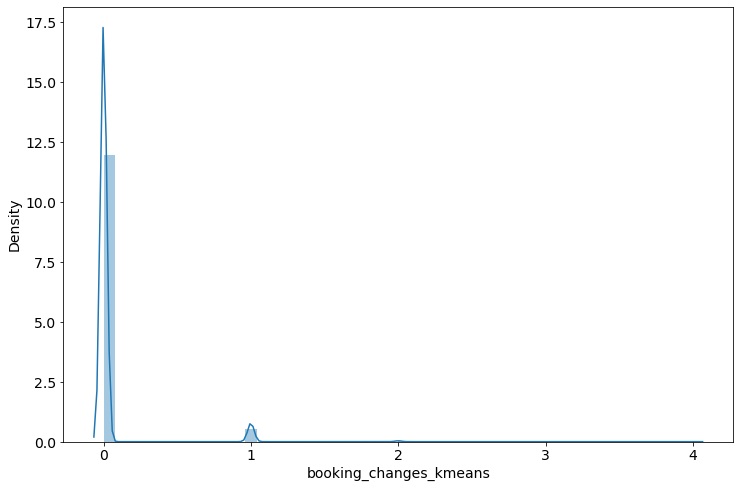

In [58]:
# Booking Changes - binning
df['booking_changes'].value_counts()
bkc = df['booking_changes']
df_bkc = df[['booking_changes']]
sns.distplot(df['booking_changes'])
plt.show()
t_booking_changes = []
for b in bkc:
    if b == 0:
        t_booking_changes.append(0)
    if b == 1:
        t_booking_changes.append(1)
    if b == 2:
        t_booking_changes.append(2)
    if b >=3 and b<=5:
        t_booking_changes.append(3)
    if b > 5:
        t_booking_changes.append(4)
df['booking_changes_bins'] = t_booking_changes
sns.distplot(df['booking_changes_bins'])
plt.show()

#Improvment - binning by Kmeans
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
bins = est.fit_transform(df_bkc).ravel()
print(bins)
df['booking_changes_kmeans'] = bins
ax = sns.distplot(df['booking_changes_kmeans'])


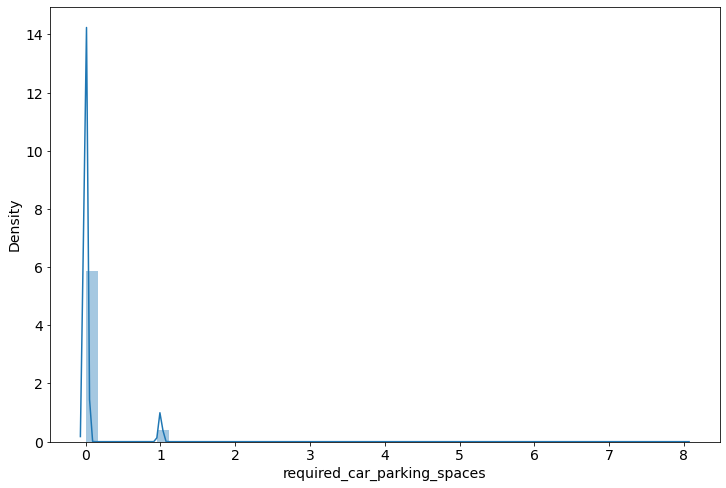

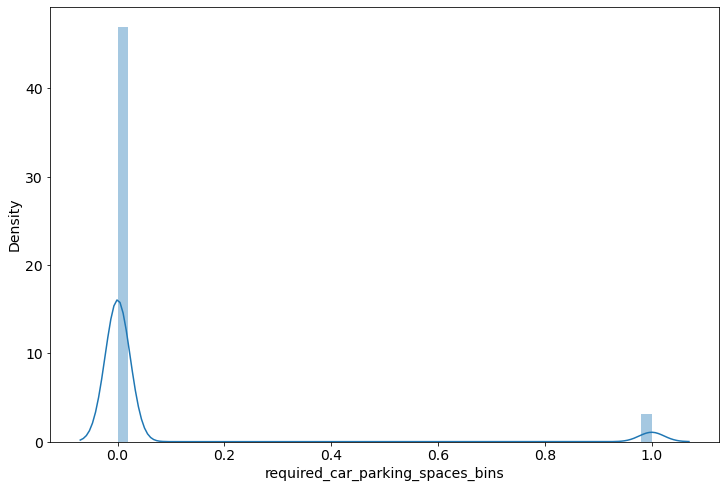

[0. 0. 0. ... 0. 0. 0.]


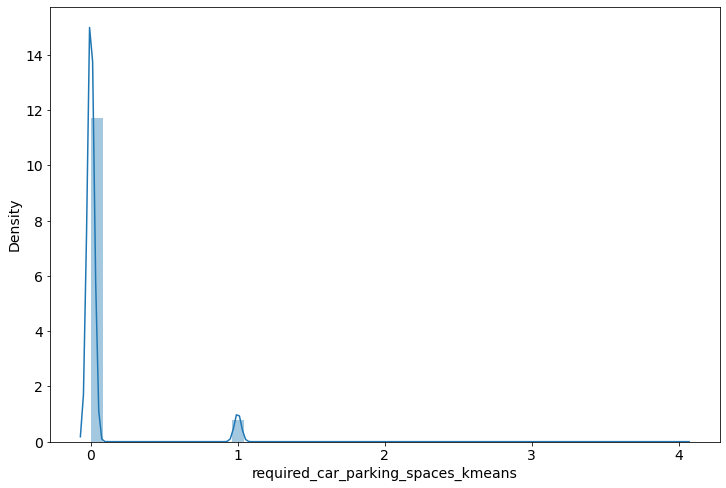

In [59]:
# required_car_parking_space -> Binary
sns.distplot(df['required_car_parking_spaces'])
plt.show()
car_parking = df['required_car_parking_spaces']
df_car_parking = df[['required_car_parking_spaces']]
converted = []
for cp in car_parking:
    if cp == 0:
        converted.append(0)
    else:
        converted.append(1)
# Push to DF
df['required_car_parking_spaces_bins'] = converted
sns.distplot(df['required_car_parking_spaces_bins'])
plt.show()

#Improvment - binning by Kmeans
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
bins = est.fit_transform(df_car_parking).ravel()
print(bins)
df['required_car_parking_spaces_kmeans'] = bins
ax = sns.distplot(df['required_car_parking_spaces_kmeans'])

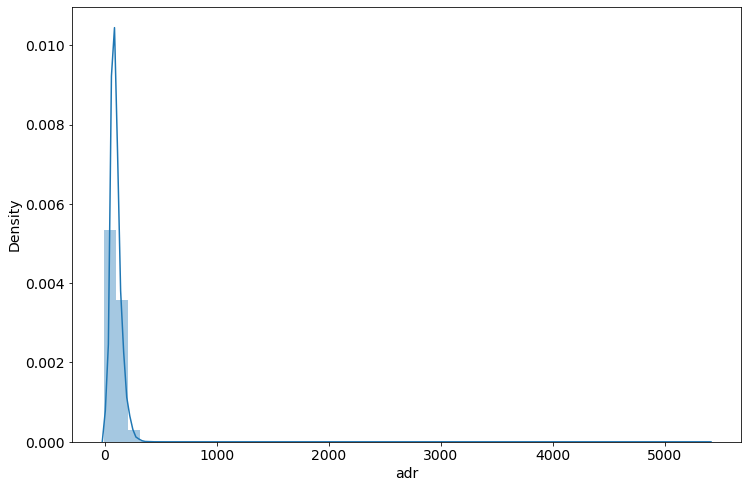

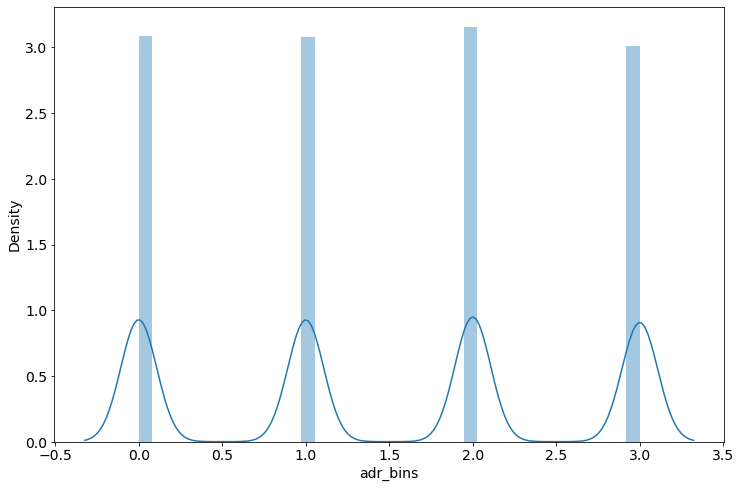

[0. 0. 1. ... 2. 1. 2.]


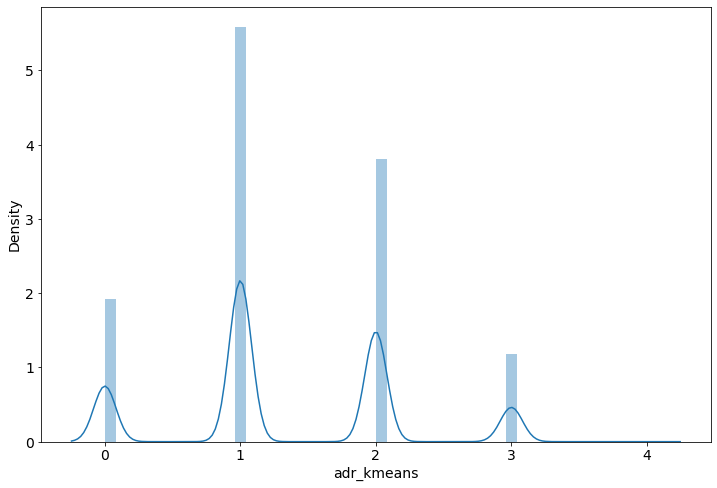

In [60]:
# adr -> binning and labeling as 0,1,2,3
sns.distplot(df['adr'])
plt.show()
labels = [0,1,2,3]
df['adr_bins'] = pd.qcut(df['adr'], q=4, labels=labels)
sns.distplot(df['adr_bins'])
plt.show()

#Improvment - binning by Kmeans
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
bins = est.fit_transform(df[['adr']]).ravel()
print(bins)
df['adr_kmeans'] = bins
ax = sns.distplot(df['adr_kmeans'])

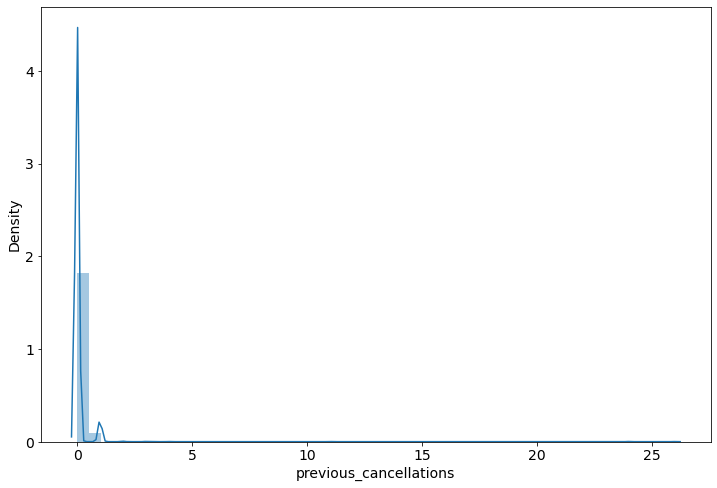

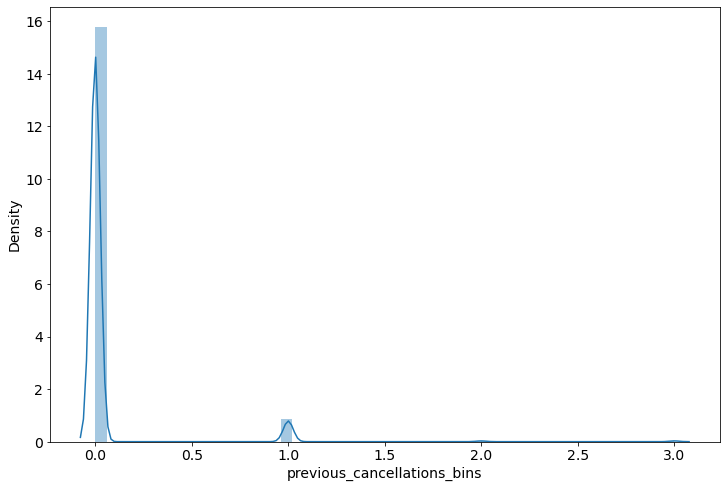

[0. 0. 0. ... 0. 0. 0.]


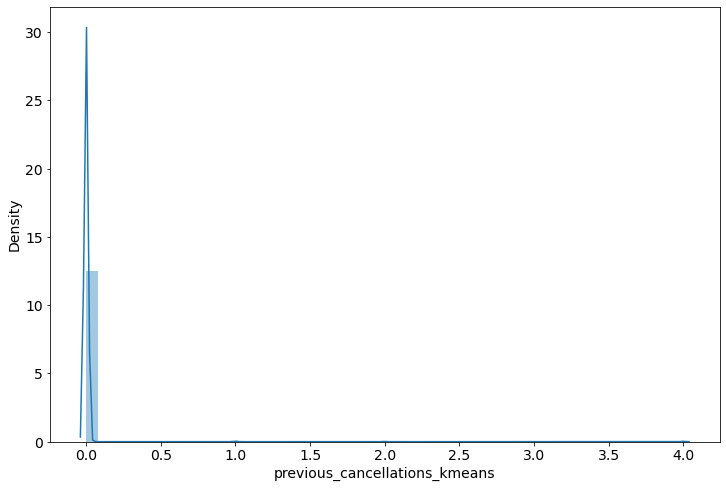

In [61]:
# previous_cancellations binning 
sns.distplot(df['previous_cancellations'])
plt.show()
prev_can = df['previous_cancellations']
df_prev_can = df[['previous_cancellations']]
converted = []
for pc in prev_can:
    if pc == 0:
        converted.append(0)
    elif pc == 1:
        converted.append(1)
    elif pc > 1 and pc < 5:
        converted.append(2)
    else: #serial canceler
        converted.append(3)
df['previous_cancellations_bins'] = converted
sns.distplot(df['previous_cancellations_bins'])
plt.show()

#Improvment - binning by Kmeans
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
bins = est.fit_transform(df_prev_can).ravel()
print(bins)
df['previous_cancellations_kmeans'] = bins
ax = sns.distplot(df['previous_cancellations_kmeans'])

In [62]:
# Derived attributes
# full date by combining the year, month & day
print(df['arrival_date_year'].value_counts())
print(df['arrival_date_month'].value_counts())
print(df['arrival_date_day_of_month'].value_counts())
df['full_date'] = df.apply(lambda row: datetime.datetime(
                                year=row['arrival_date_year'], 
                                month=row['arrival_date_month'], 
                                day=row['arrival_date_day_of_month']), 
                           axis=1)
df['full_date']

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64
8     13877
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64
17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64


0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: full_date, Length: 119390, dtype: datetime64[ns]

##### Categorization by LabelEncoder()

In [63]:
# Change to categorical
enc = LabelEncoder()
df["hotel"] = enc.fit_transform(np.array(df["hotel"]))
df["meal"] = enc.fit_transform(np.array(df["meal"]))
df["country"] = enc.fit_transform(np.array(df["country"]))
df["market_segment"] = enc.fit_transform(np.array(df["market_segment"]))
df["distribution_channel"] = enc.fit_transform(np.array(df["distribution_channel"]))
df["reserved_room_type"] = enc.fit_transform(np.array(df["reserved_room_type"]))
df["assigned_room_type"] = enc.fit_transform(np.array(df["assigned_room_type"]))
df["deposit_type"] = enc.fit_transform(np.array(df["deposit_type"]))
df["customer_type"] = enc.fit_transform(np.array(df["customer_type"]))

### Construct data

##### Derived attributes

In [64]:
# Is reserved room equales assigned room
df['is_reserved_equales_assigned'] = np.where(df['reserved_room_type']==df['assigned_room_type'], 1, 0)

In [65]:
# Create new attribute of day in year from 1 up to 366 (2016 was a leap year)
df['day_of_year'] = df['full_date'].apply(lambda row: row.timetuple().tm_yday)
df['day_of_year']

0         182
1         182
2         182
3         182
4         182
         ... 
119385    242
119386    243
119387    243
119388    243
119389    241
Name: day_of_year, Length: 119390, dtype: int64

In [66]:
# Create new Boolean attribute: is holiday season (Christmas/new year)
df['is_holiday_season'] = np.where(df['day_of_year']>=355, 1, 0)

In [67]:
# Create new numeric attribute: total stay nights
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [68]:
# Create new numerric attribute: total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: cancellation_precentage, Length: 119390, dtype: float64
0.000000    112906
1.000000      5837
0.500000        66
0.250000        49
0.166667        45
             ...  
0.081967         1
0.068966         1
0.120000         1
0.227273         1
0.157895         1
Name: cancellation_precentage, Length: 111, dtype: int64
0    112906
1      5837
2       647
Name: cancellation_precentage_bins, dtype: int64


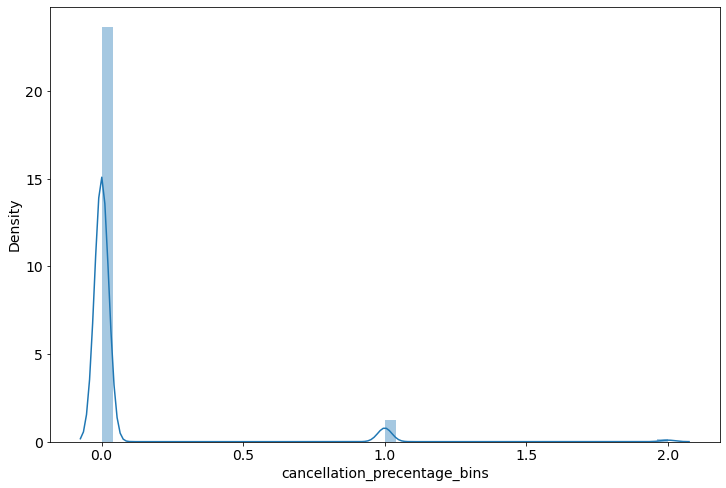

In [69]:
# Improvments - New attribute - cancellation_precentage
import decimal
df['cancellation_precentage'] = df['previous_cancellations'] / (df['previous_bookings_not_canceled']+df['previous_cancellations'])
df['cancellation_precentage'].fillna(0, inplace=True)
print(df['cancellation_precentage'])
print(df['cancellation_precentage'].value_counts())
converted = []
for prec in df['cancellation_precentage']:
    if prec == 0:
        converted.append(0)
    elif prec == 1:
        converted.append(1)
    else:
        converted.append(2)
df['cancellation_precentage_bins'] = converted
print(df['cancellation_precentage_bins'].value_counts())
ax = sns.distplot(df['cancellation_precentage_bins'])

In [70]:
# Improvments - New features - total_stay_nights*lead_time and total_stay_night/lead
import decimal
print(df['lead_time'].value_counts())
df["lead_time"].replace({0: 1}, inplace=True)
print(df['lead_time'].value_counts())
df['nights_times_lead'] = df['total_stay_nights'] * df['lead_time']
df['nights_lead_ratio'] = df['total_stay_nights'] / df['lead_time']
df['nights_times_lead'].fillna(0, inplace=True)
df['nights_lead_ratio'].fillna(0, inplace=True)
print(df['nights_times_lead'].value_counts())
print(df['nights_lead_ratio'].value_counts())

# ax = sns.distplot(df['cancellation_precentage_bins'])

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
370       1
435       1
371       1
380       1
709       1
Name: lead_time, Length: 479, dtype: int64
1      9805
2      2069
3      1816
4      1715
5      1565
       ... 
532       1
435       1
371       1
463       1
370       1
Name: lead_time, Length: 478, dtype: int64
1       5985
2       2876
3       1627
4       1550
6       1251
        ... 
5292       1
1614       1
4844       1
271        1
1102       1
Name: nights_times_lead, Length: 2102, dtype: int64
1.000000    7086
2.000000    2027
0.500000    1981
0.333333    1601
0.250000    1444
            ... 
0.010135       1
0.056122       1
0.397727       1
0.081481       1
0.161765       1
Name: nights_lead_ratio, Length: 2848, dtype: int64


Text(0.5, 1.0, 'Pearson Correlation Heatmap')

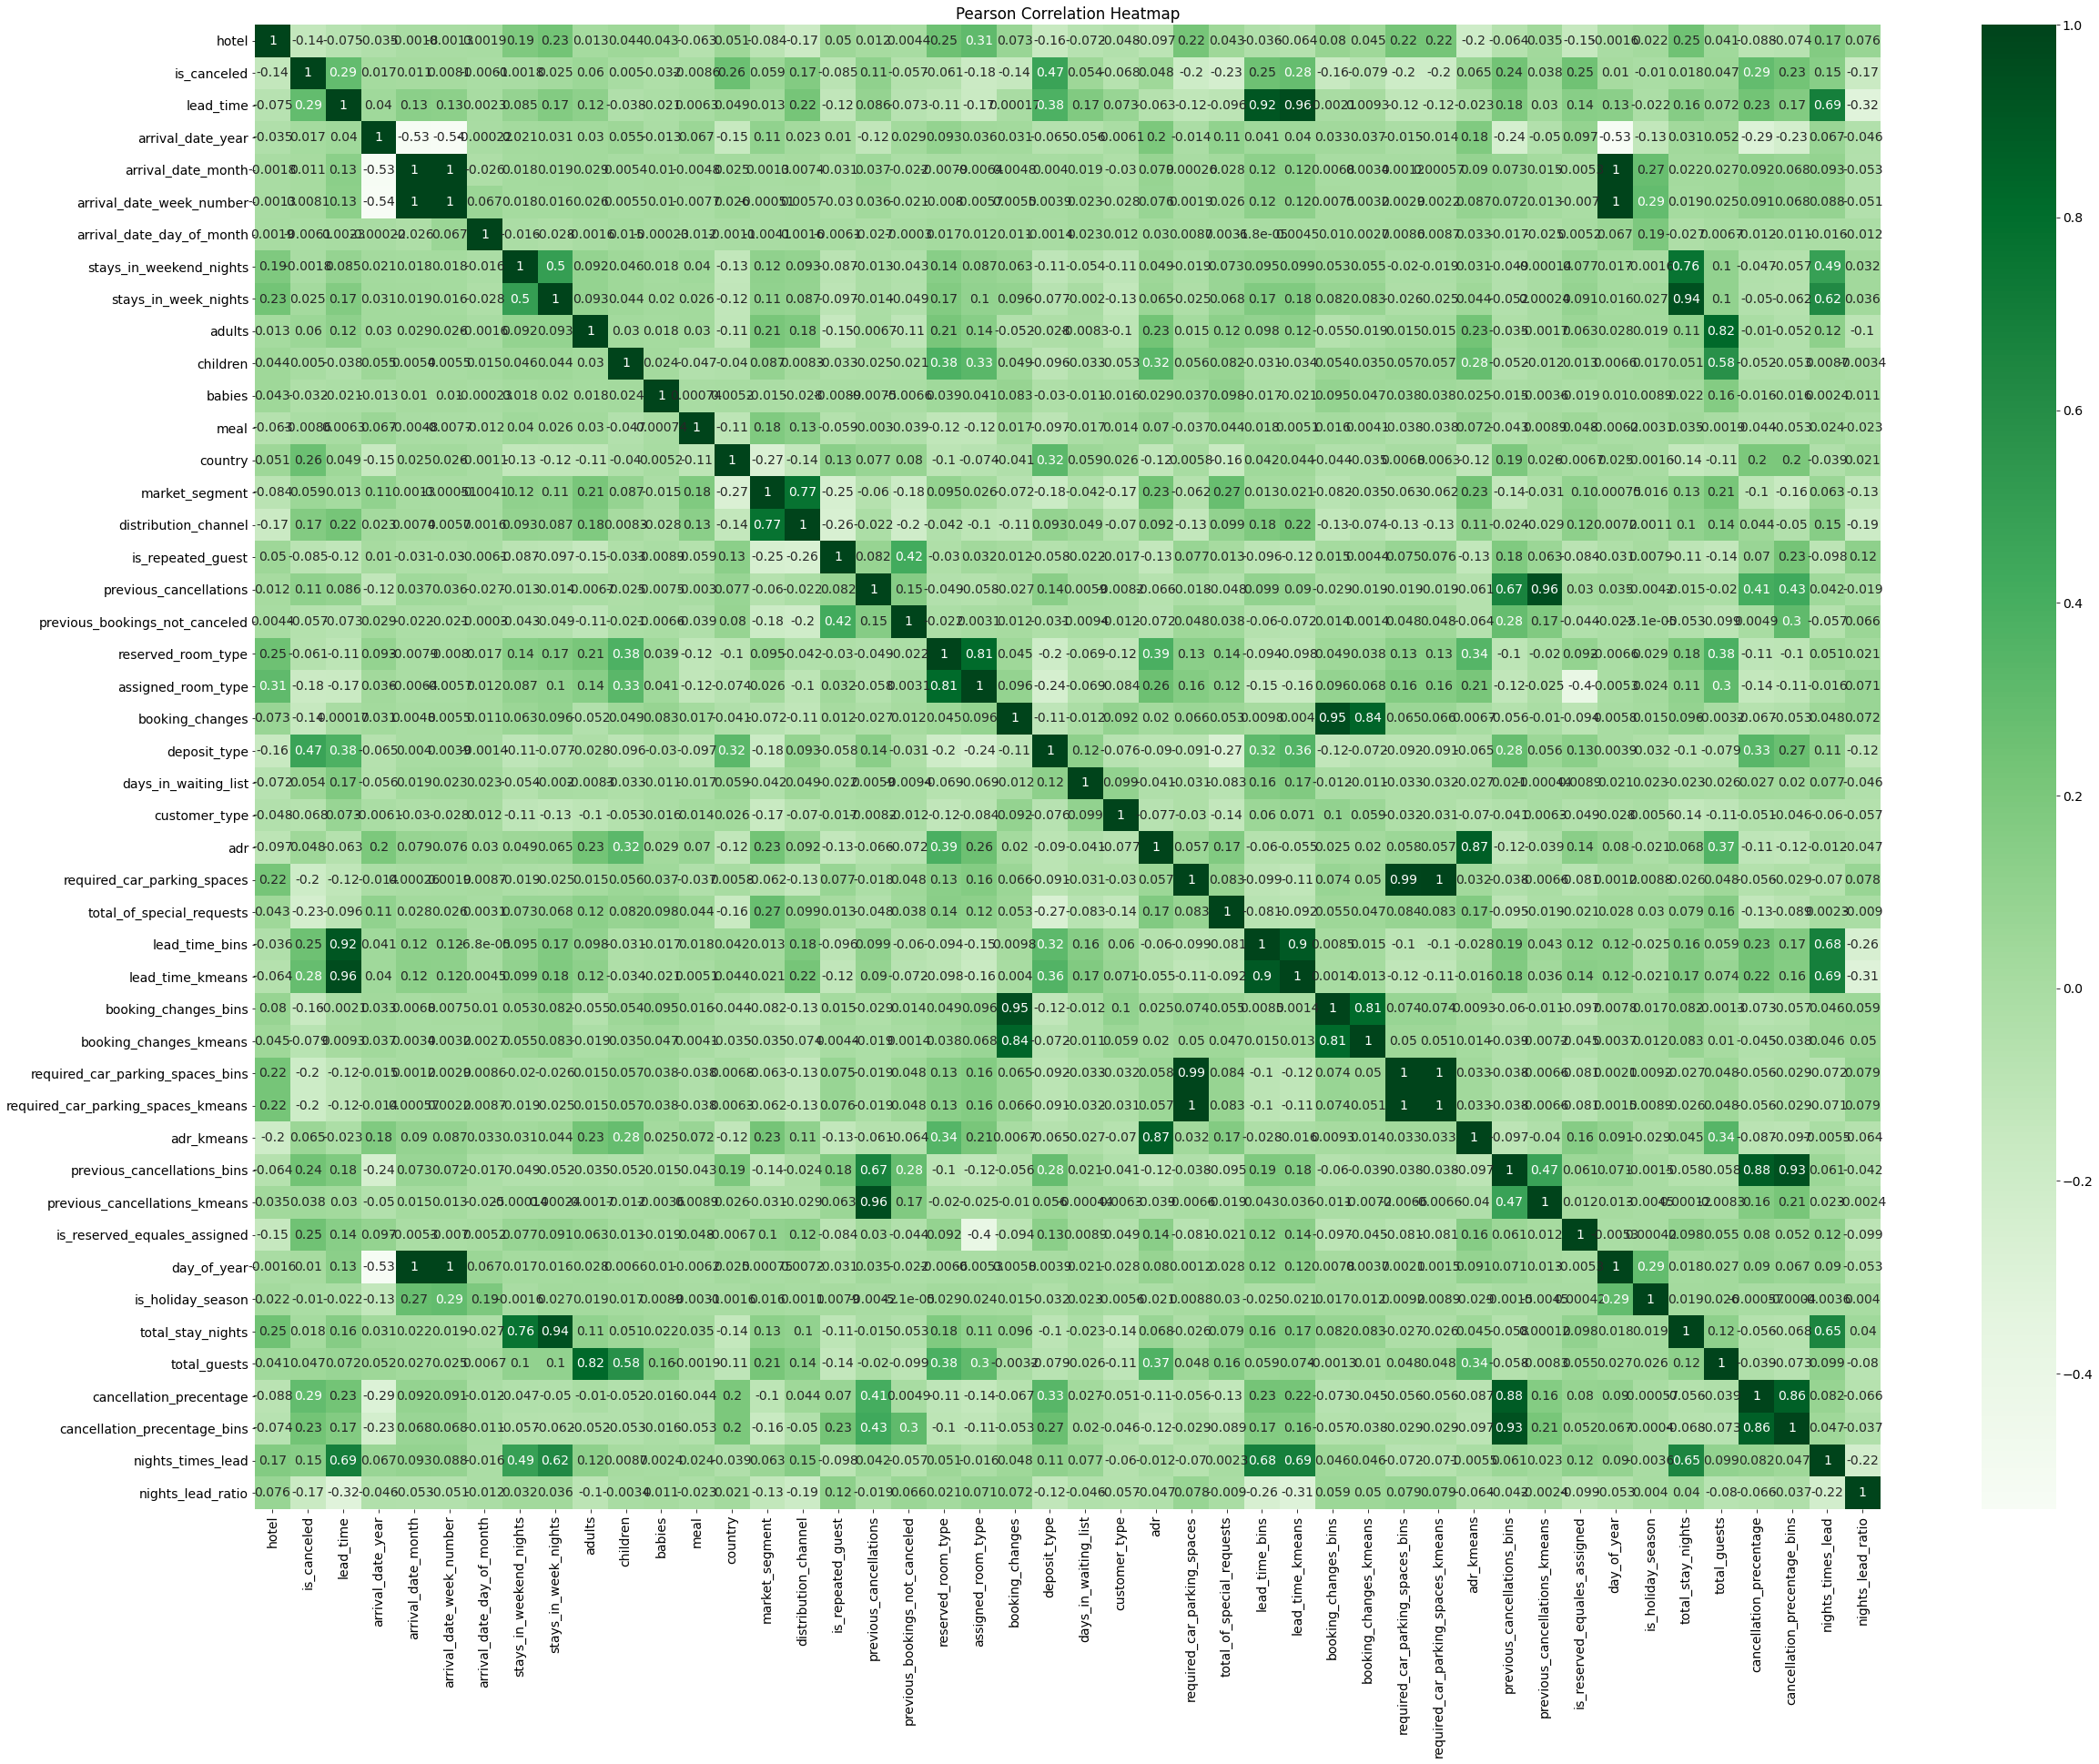

In [71]:
# Correlation heatmap using the pearson method
fig = plt.figure(figsize=(90,60))
# clean_df = pd.read_csv('hotel_bookings.csv')
df_heatmap=df.drop(['full_date', 'Id'], axis=1)
sns.heatmap(df_heatmap.corr(method='pearson'), annot = True, cmap="Greens")
plt.title("Pearson Correlation Heatmap")

In [72]:
# Columns grouping
labels = ['is_canceled', 'Id']
original_columns = ['full_date', 'lead_time', 'booking_changes', 'adr', 'previous_cancellations', 'required_car_parking_spaces']
initial_bins = ['lead_time_bins', 'booking_changes_bins', 'adr_bins', 'previous_cancellations_bins', 'required_car_parking_spaces_bins']
kmeans_bins = ['lead_time_kmeans', 'booking_changes_kmeans', 'adr_kmeans', 'previous_cancellations_kmeans', 'required_car_parking_spaces_kmeans']
improvments_new_attributes = ['cancellation_precentage_bins', 'cancellation_precentage', 'nights_lead_ratio', 'nights_times_lead']
history_attributes = ['previous_cancellations_kmeans', 'previous_bookings_not_canceled', 'is_repeated_guest', 'cancellation_precentage_bins', 'cancellation_precentage']
ignored_columns = labels + original_columns + kmeans_bins + improvments_new_attributes
ignored_columns_NB = labels + initial_bins + kmeans_bins + improvments_new_attributes
ignored_columns_after_improvments = labels + original_columns + initial_bins
ignored_columns_no_history = labels + original_columns + initial_bins + history_attributes

## Modeling & Evaluation

In [73]:
# Model Preperation
kf = KFold(n_splits=10, random_state=42, shuffle=True)
X=df.drop(ignored_columns, axis=1)
print(X.columns)
y=df['is_canceled']
models_comparison = pd.DataFrame()

Index(['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'total_of_special_requests',
       'lead_time_bins', 'booking_changes_bins',
       'required_car_parking_spaces_bins', 'adr_bins',
       'previous_cancellations_bins', 'is_reserved_equales_assigned',
       'day_of_year', 'is_holiday_season', 'total_stay_nights',
       'total_guests'],
      dtype='object')


### Models comparison default parameters (in note - tuned parameters)

In [74]:
# Random forest - default parametrs
scores=[]
models=[]
reports=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     m = RandomForestClassifier(n_estimators = 300, min_samples_split = 4, random_state = 42) #tuned
    m = RandomForestClassifier(random_state = 42) #default
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    y_pred = m.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    scores.append(score)
    models.append(m)
    reports.append(report)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.8859
0.8837
0.8796
0.8778
0.8749
0.8765
0.8786
0.8800
0.8831
0.8755
K-fold mean score: 0.8796


              precision    recall  f1-score
0              0.889345  0.932687  0.910501
1              0.879489  0.808912  0.842725
accuracy       0.885920  0.885920  0.885920
macro avg      0.884417  0.870799  0.876613
weighted avg   0.885621  0.885920  0.884893
                        precision    recall  f1-score  accuracy
RandomForestClassifier   0.884417  0.870799  0.876613   0.88592


<BarContainer object of 32 artists>

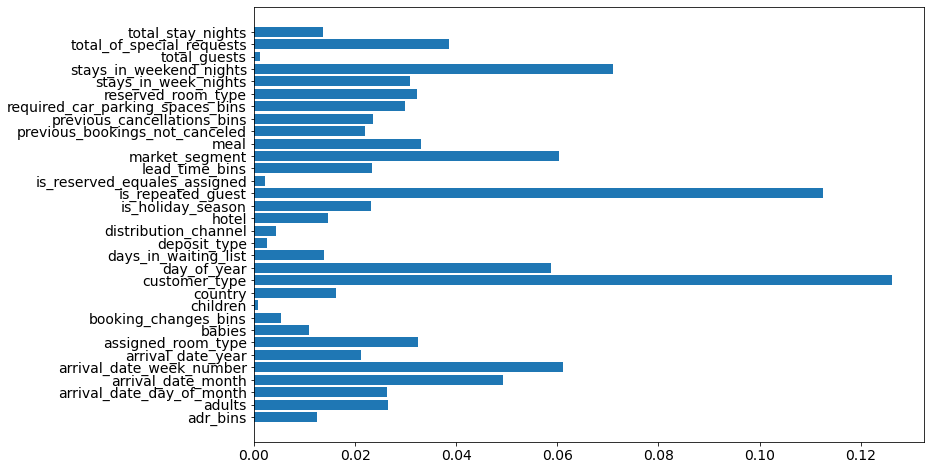

In [75]:
# Evaluation
# Scores
best_score_index = np.argmax(scores)
best_model = models[best_score_index]
report = pd.DataFrame(reports[best_score_index]).drop(['support'])
print(report.transpose())
scores = report['macro avg']
scores.loc['accuracy'] = reports[best_score_index]['accuracy']
models_comparison['RandomForestClassifier'] = scores
print(models_comparison.transpose())

# Feature importance
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(sorted(X), best_model.feature_importances_)


Text(0.5, 0, 'Random Forest Feature Importance')

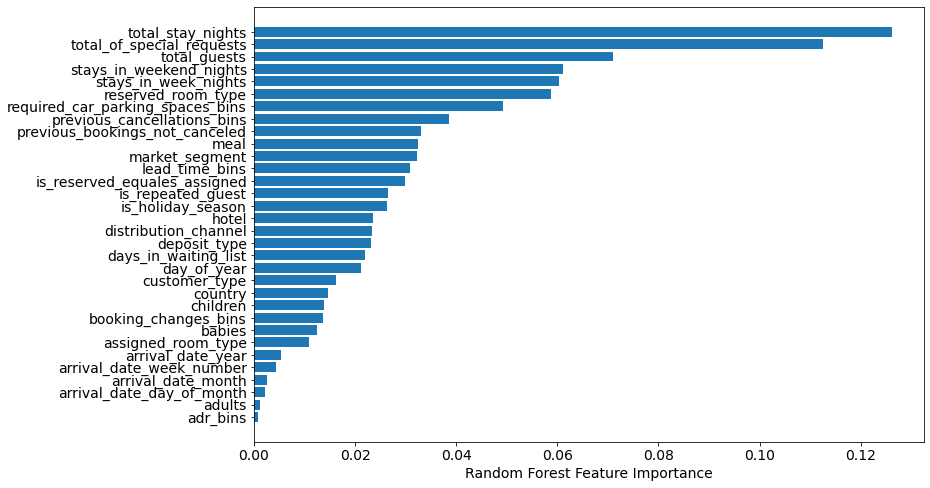

In [78]:
# Sort feature importance 
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(sorted(X), best_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [79]:
# XGboost - default parametrs 
scores=[]
models=[]
reports=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     m = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=8, random_state=42) #tuned
    m = GradientBoostingClassifier(random_state=42) #default
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    y_pred = m.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    scores.append(score)
    models.append(m)
    reports.append(report)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.8412
0.8338
0.8349
0.8306
0.8336
0.8323
0.8396
0.8301
0.8359
0.8392
K-fold mean score: 0.8351


              precision    recall  f1-score
0              0.837811  0.923533  0.878586
1              0.848574  0.705609  0.770516
accuracy       0.841193  0.841193  0.841193
macro avg      0.843193  0.814571  0.824551
weighted avg   0.841878  0.841193  0.837753
                            precision    recall  f1-score  accuracy
RandomForestClassifier       0.884417  0.870799  0.876613  0.885920
GradientBoostingClassifier   0.843193  0.814571  0.824551  0.841193


<BarContainer object of 32 artists>

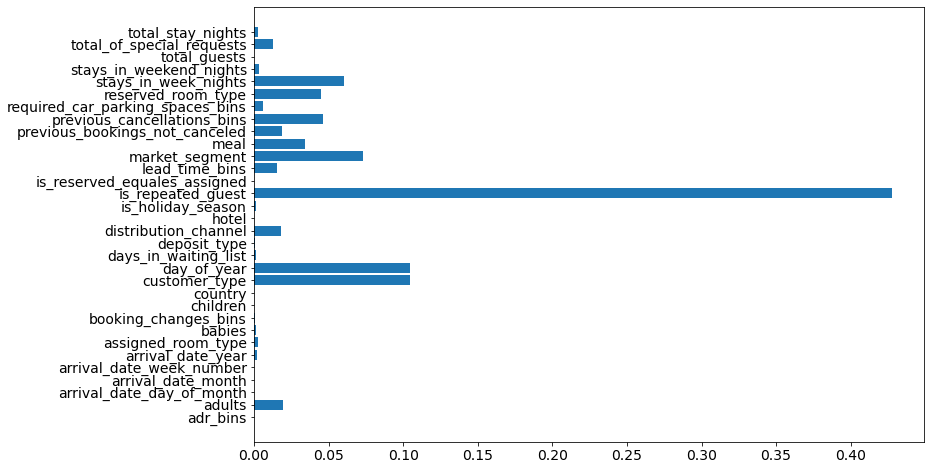

In [81]:
# Evaluation
# Scores
best_score_index = np.argmax(scores)
best_model = models[best_score_index]
report = pd.DataFrame(reports[best_score_index]).drop(['support'])
print(report.transpose())
scores = report['macro avg']
scores.loc['accuracy'] = reports[best_score_index]['accuracy']
models_comparison['GradientBoostingClassifier'] = scores
print(models_comparison.transpose())

# Feature importance 
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(sorted(X), best_model.feature_importances_)

Text(0.5, 0, 'XGBoost Feature Importance')

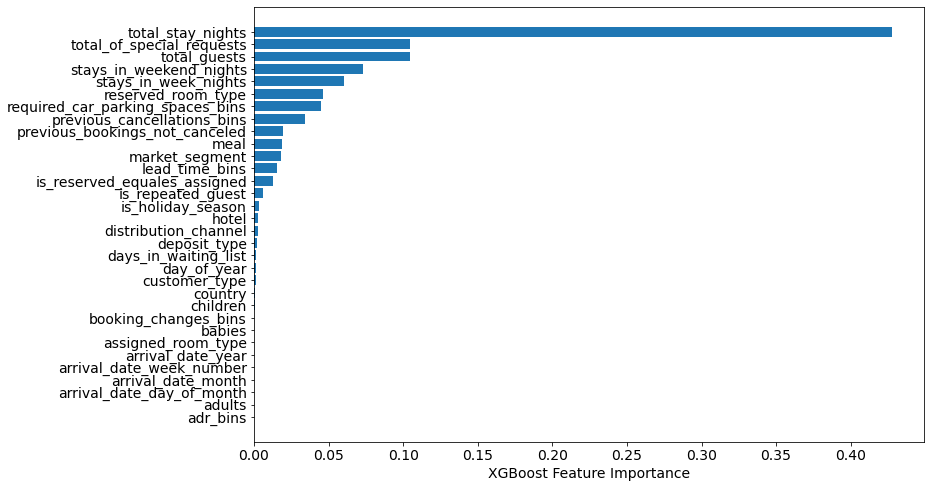

In [82]:
# Sort feature importance 
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(sorted(X), best_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

In [83]:
# Logistic Regression - Default parameters
from sklearn.linear_model import LogisticRegression
scores=[]
models=[]
reports=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     m = LogisticRegression(max_iter = 1000, random_state=42) #tuned
    m = LogisticRegression(penalty='l2', random_state=42) #default
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    y_pred = m.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    scores.append(score)
    models.append(m)
    reports.append(report)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.7624
0.7504
0.7469
0.7476
0.7465
0.7535
0.7400
0.7478
0.7470
0.7489
K-fold mean score: 0.7491


In [84]:
# Evaluation
# Scores
best_score_index = np.argmax(scores)
best_model = models[best_score_index]
report = pd.DataFrame(reports[best_score_index]).drop(['support'])
print(report.transpose())
scores = report['macro avg']
scores.loc['accuracy'] = reports[best_score_index]['accuracy']
models_comparison['LogisticRegression'] = scores
print(models_comparison.transpose())

              precision    recall  f1-score
0              0.778749  0.863355  0.818873
1              0.725972  0.596098  0.654656
accuracy       0.762375  0.762375  0.762375
macro avg      0.752361  0.729727  0.736764
weighted avg   0.758808  0.762375  0.756825
                            precision    recall  f1-score  accuracy
RandomForestClassifier       0.884417  0.870799  0.876613  0.885920
GradientBoostingClassifier   0.843193  0.814571  0.824551  0.841193
LogisticRegression           0.752361  0.729727  0.736764  0.762375


In [85]:
# Naive Bayes - default parameters
from sklearn.naive_bayes import GaussianNB
scores=[]
models=[]
reports=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m = GaussianNB(var_smoothing=1e-09) #default
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    y_pred = m.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    scores.append(score)
    models.append(m)
    reports.append(report)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.5969
0.5992
0.5859
0.5898
0.5882
0.5918
0.5931
0.5836
0.5892
0.5833
K-fold mean score: 0.5901


In [86]:
# Evaluation
# Scores
best_score_index = np.argmax(scores)
best_model = models[best_score_index]
report = pd.DataFrame(reports[best_score_index]).drop(['support'])
print(report.transpose())
scores = report['macro avg']
scores.loc['accuracy'] = reports[best_score_index]['accuracy']
models_comparison['GaussianNB'] = scores
print(models_comparison.transpose())

              precision    recall  f1-score
0              0.909174  0.400187  0.555752
1              0.481207  0.932960  0.634928
accuracy       0.599213  0.599213  0.599213
macro avg      0.695191  0.666573  0.595340
weighted avg   0.749300  0.599213  0.585329
                            precision    recall  f1-score  accuracy
RandomForestClassifier       0.884417  0.870799  0.876613  0.885920
GradientBoostingClassifier   0.843193  0.814571  0.824551  0.841193
LogisticRegression           0.752361  0.729727  0.736764  0.762375
GaussianNB                   0.695191  0.666573  0.595340  0.599213


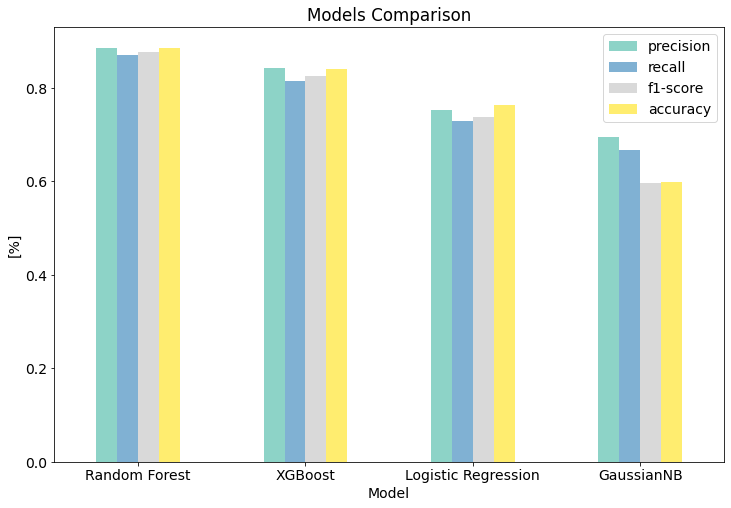

In [87]:
# Models comparison
models_comparison.transpose().plot.bar(rot=0, colormap='Set3')
plt.ylabel('[%]')
plt.xlabel('Model')
plt.title('Models Comparison')
plt.xticks((0, 1, 2, 3), ['Random Forest', 'XGBoost', 'Logistic Regression', 'GaussianNB'])
plt.show()

### Hyper parameter tuning 

In [88]:
# hyperparameter tunning - general

# from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_score, recall_score, f1_score

# scoring = {
#     'accuracy': make_scorer(accuracy_score),
#     'precision': make_scorer(precision_score, average='macro'),
#     'recall': make_scorer(recall_score),
#     'f1': make_scorer(f1_score, average='macro')
# }
# refit_metric = 'accuracy'

In [89]:
# RF hyperparameter tunning

# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# metric_models = []

# param_grid = { # accuracy 0.881
#     'n_estimators': [100, 200, 300],
#     'max_depth' : [2, 4, None],
#     'min_samples_split':[2, 4]
# }

# #  default (n_estimators = 100, creterion:=‘gini’, min_samples_split=2, min_samples_leaf=1)

# comb = 1
# for list_ in param_grid.values():
#     comb *= len(list_)
# print(comb)
# grid_search_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=42), return_train_score=True, param_grid=param_grid, refit=refit_metric, cv=kf, verbose=2, scoring=scoring)
# grid_search_RF.fit(X, y)
# print(grid_search_RF.cv_results_)
# print(grid_search_RF.best_params_)
# print(round(grid_search_RF.cv_results_['mean_train_accuracy'][grid_search_RF.best_index_], 3))
# print(round(grid_search_RF.best_score_, 3))
# best_model_RF = grid_search_RF.best_estimator_
# accuracy_scores.append(grid_search_RF.cv_results_['mean_test_accuracy'][grid_search_RF.best_index_])
# precision_scores.append(grid_search_RF.cv_results_['mean_test_precision'][grid_search_RF.best_index_])
# recall_scores.append(grid_search_RF.cv_results_['mean_test_recall'][grid_search_RF.best_index_])
# f1_scores.append(grid_search_RF.cv_results_['mean_test_f1'][grid_search_RF.best_index_])
# metric_models.append('RF')


In [90]:
# # XGBoost hyperparameter tunning

# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# metric_models = []

# param_grid = { # accuracy 0.87
#     'n_estimators': [50, 100, 200], 
#     'max_depth' : [2, 4, 8],
#     'learning_rate' : [0.05, 0.1]
# }

# # default )n_estimators=100, learning_rate=0.1, max_depth=3)

# comb = 1
# for list_ in param_grid.values():
#     comb *= len(list_)
# print(comb)

# grid_search_XGB = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), return_train_score=True, param_grid=param_grid, refit=refit_metric, cv=kf, verbose=2, scoring=scoring)
# grid_search_XGB.fit(X, y)
# print(grid_search_XGB.cv_results_)
# print(grid_search_XGB.best_params_)
# print(round(grid_search_XGB.cv_results_['mean_train_accuracy'][grid_search_XGB.best_index_], 3))
# print(round(grid_search_XGB.best_score_, 3))
# best_model_XGB = grid_search_XGB.best_estimator_
# accuracy_scores.append(grid_search_XGB.cv_results_['mean_test_accuracy'][grid_search_XGB.best_index_])
# precision_scores.append(grid_search_XGB.cv_results_['mean_test_precision'][grid_search_XGB.best_index_])
# recall_scores.append(grid_search_XGB.cv_results_['mean_test_recall'][grid_search_XGB.best_index_])
# f1_scores.append(grid_search_XGB.cv_results_['mean_test_f1'][grid_search_XGB.best_index_])
# metric_models.append('XGBoost')


In [91]:
# # Logistic regression hyperparameter tunning

# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# metric_models = []

# param_grid = { # accuracy 0.79
#     'max_iter': [200, 500, 1000],
#     'penalty': ['l1', 'l2']
# }

# # Default (penalty='l2‘, tol=0.0001, C=1.0, intercept_scaling=1, max_iter=100)

# comb = 1
# for list_ in param_grid.values():
#     comb *= len(list_)
# print(comb)
# grid_search_LR = GridSearchCV(estimator=LogisticRegression(random_state=42), return_train_score=True, param_grid=param_grid, refit=refit_metric, cv=kf, verbose=2, scoring=scoring)
# grid_search_LR.fit(X, y)
# print(grid_search_LR.cv_results_)
# print(grid_search_LR.best_params_)
# print(round(grid_search_LR.cv_results_['mean_train_accuracy'][grid_search_LR.best_index_], 3))
# print(round(grid_search_LR.best_score_, 3))
# best_model_LR = grid_search_LR.best_estimator_
# accuracy_scores.append(grid_search_LR.cv_results_['mean_test_accuracy'][grid_search_LR.best_index_])
# precision_scores.append(grid_search_LR.cv_results_['mean_test_precision'][grid_search_LR.best_index_])
# recall_scores.append(grid_search_LR.cv_results_['mean_test_recall'][grid_search_LR.best_index_])
# f1_scores.append(grid_search_LR.cv_results_['mean_test_f1'][grid_search_LR.best_index_])
# metric_models.append('LR')

### Review Process (improvements)

In [92]:
# Improvments
kf = KFold(n_splits=10, random_state=42, shuffle=True)
X=df.drop(ignored_columns_after_improvments+['cancellation_precentage'], axis=1)
print(X.columns)
y=df['is_canceled']

Index(['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'total_of_special_requests',
       'lead_time_kmeans', 'booking_changes_kmeans',
       'required_car_parking_spaces_kmeans', 'adr_kmeans',
       'previous_cancellations_kmeans', 'is_reserved_equales_assigned',
       'day_of_year', 'is_holiday_season', 'total_stay_nights', 'total_guests',
       'cancellation_precentage_bins', 'nights_times_lead',
       'nights_lead_ratio'],
      dtype='object')


In [93]:
# Random forest - default parameters + improvments
scores=[]
models=[]
reports=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m = RandomForestClassifier(random_state = 42) #default
#      optimized
#     'max_depth': None, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 300
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    y_pred = m.predict(X_test)
    report = classification_report(y_test, y_pred)
    scores.append(score)
    models.append(m)
    reports.append(report)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.8945
0.8910
0.8904
0.8883
0.8845
0.8868
0.8922
0.8909
0.8934
0.8890
K-fold mean score: 0.8901


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7428
           1       0.89      0.83      0.86      4511

    accuracy                           0.89     11939
   macro avg       0.89      0.88      0.89     11939
weighted avg       0.89      0.89      0.89     11939



<BarContainer object of 35 artists>

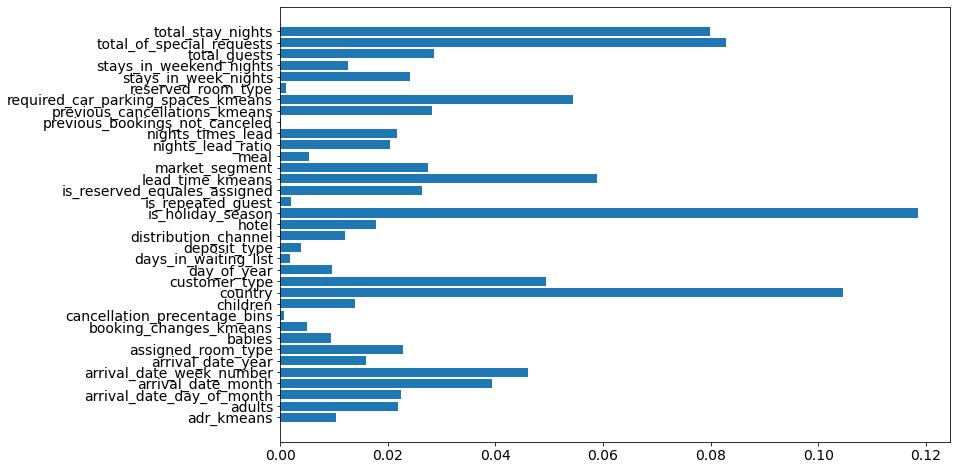

In [94]:
# Evaluation
best_score_index = np.argmax(scores)
best_model = models[best_score_index]
print(reports[best_score_index])

from sklearn.inspection import permutation_importance
# X = pd.DataFrame(df, columns=sorted(df.drop(['is_canceled','full_date','Id'], axis=1)))
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(sorted(X), best_model.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

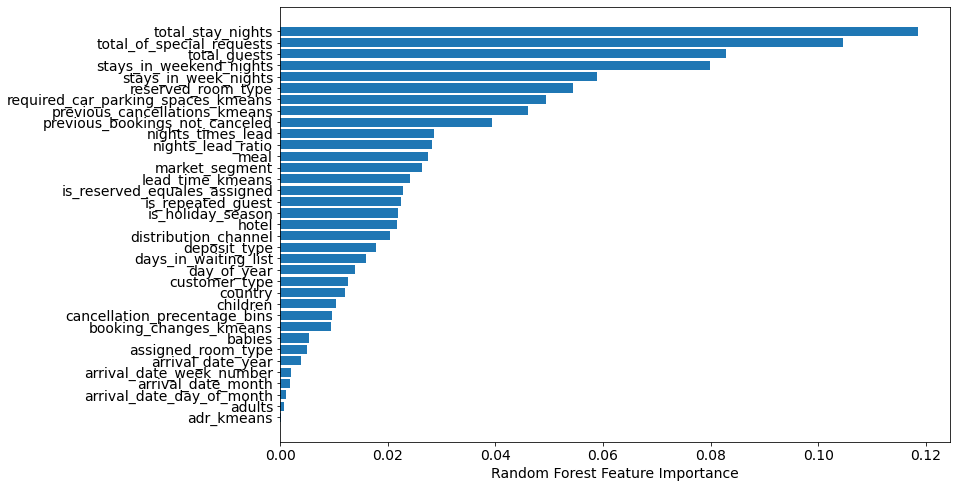

In [95]:
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(sorted(X), best_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [96]:
# XGboost - tuned parametrs + improvments
scores=[]
models=[]
reports=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 200, random_state=42)
# {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    y_pred = m.predict(X_test)
    report = classification_report(y_test, y_pred)
    scores.append(score)
    models.append(m)
    reports.append(report)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.8799
0.8795
0.8802
0.8804
0.8745
0.8764
0.8791
0.8785
0.8790
0.8793
K-fold mean score: 0.8787


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7511
           1       0.87      0.80      0.83      4428

    accuracy                           0.88     11939
   macro avg       0.88      0.86      0.87     11939
weighted avg       0.88      0.88      0.88     11939



<BarContainer object of 35 artists>

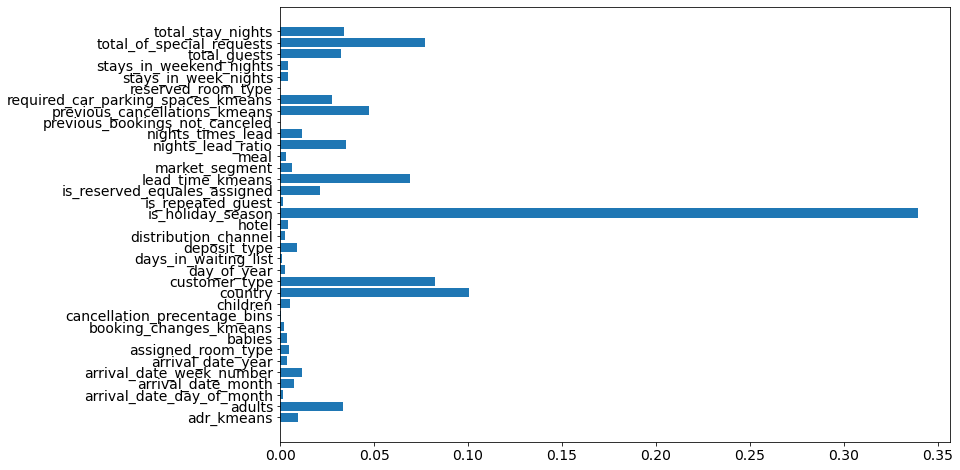

In [97]:
# Evaluation
best_score_index = np.argmax(scores)
best_model = models[best_score_index]
print(reports[best_score_index])

from sklearn.inspection import permutation_importance
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(sorted(X), best_model.feature_importances_)

Text(0.5, 0, 'XGBoost Feature Importance')

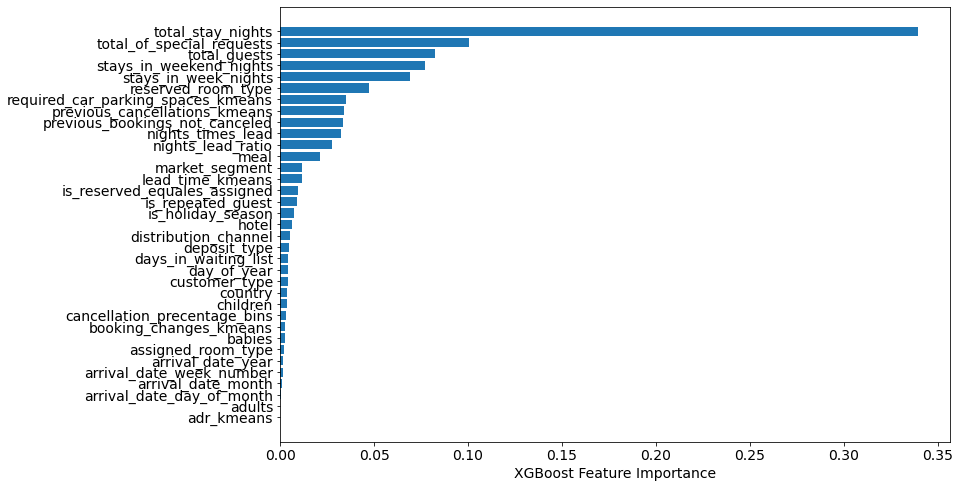

In [98]:
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(sorted(X), best_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

In [99]:
# Logistic Regression - tuned parameters + improvments
from sklearn.linear_model import LogisticRegression
scores=[]
models=[]
reports=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     X_train, X_test, y_train, y_test = train_test_split(df[t_cols], df['is_canceled'], test_size=0.2)
#     m = LogisticRegression(penalty='l2', random_state=42) #default
    m = LogisticRegression(max_iter = 1000, random_state=42) #optimized
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    y_pred = m.predict(X_test)
    report = classification_report(y_test, y_pred)
    scores.append(score)
    models.append(m)
    reports.append(report)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.7815
0.7864
0.7877
0.7871
0.7823
0.7744
0.7903
0.7822
0.7821
0.7833
K-fold mean score: 0.7837


In [100]:
# Evaluation
best_score_index = np.argmax(scores)
best_model = models[best_score_index]
print(reports[best_score_index])

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      7432
           1       0.80      0.60      0.68      4507

    accuracy                           0.79     11939
   macro avg       0.79      0.75      0.76     11939
weighted avg       0.79      0.79      0.78     11939

